In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/churn.csv')

In [2]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [3]:
df.shape

(7043, 21)

In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
df['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [6]:
df=df.dropna(how='any')

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_encoded = pd.get_dummies(df, columns=['StreamingMovies','gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first=True,dtype=float)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,34,56.95,1889.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,53.85,108.15,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,45,42.30,1840.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [9]:
x=df_encoded.drop(['Churn_Yes'],axis=1)
y=df_encoded['Churn_Yes']

In [10]:
x.head()

,tenure,MonthlyCharges,TotalCharges,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,45,42.30,1840.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x13a8c8050>,
 'caps': [<matplotlib.lines.Line2D at 0x13a8c8650>,
 'boxes': [<matplotlib.lines.Line2D at 0x13a887e90>],
 'medians': [<matplotlib.lines.Line2D at 0x13a8c8cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13a8c8f80>],
 'means': []}

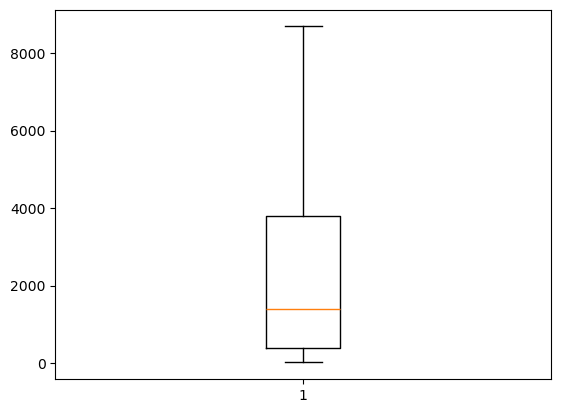

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(x['TotalCharges'])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Specify the columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit and transform the selected columns
x[columns_to_scale] = scaler.fit_transform(x[columns_to_scale])

In [13]:
x.head()

,tenure,MonthlyCharges,TotalCharges,StreamingMovies_No internet service,StreamingMovies_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.064303,-0.260878,-0.173740,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.239504,-0.363923,-0.959649,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.512486,-0.747850,-0.195248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [15]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
skf_score=cross_val_score(model,x,y,cv=skf)

In [22]:
skf_score.mean()

0.8044643678579263

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [28]:
skf_score_clf=cross_val_score(clf,x,y,cv=skf)
skf_score_clf.mean()

0.7263954561676478

In [32]:
model.fit(x,y)

LogisticRegression()

In [34]:
y_pred=model.predict(x)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,ConfusionMatrixDisplay

In [40]:
cm=confusion_matrix(y,y_pred)
cm

array([[4638,  525],
       [ 833, 1036]])

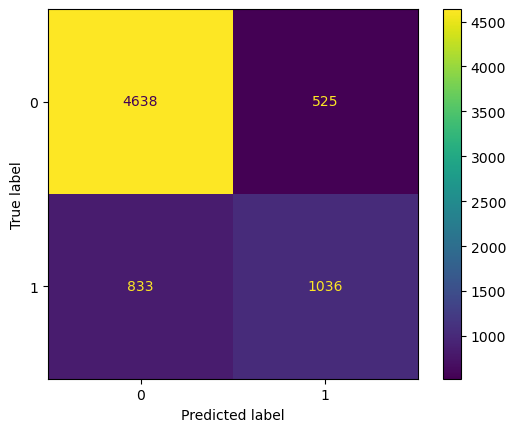

In [42]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [44]:
accuracy=accuracy_score(y,y_pred)
print(f'Accuracy of this model is {accuracy*100:.2f}%')

Accuracy of this model is 80.69%


In [48]:
# Calculate recall/sensitivity
recall = recall_score(y, y_pred)
print(f'Recall is: {recall*100:.2f}%')

Recall is: 55.43%


In [50]:
# Calculate specificity
specificity = recall_score(y, y_pred,pos_label=0)
print(f'Specificity is: {specificity*100:.2f}%')

Specificity is: 89.83%


In [54]:
classification_report=classification_report(y, y_pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      5163
         1.0       0.66      0.55      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032

